# 5CS037 Final Portfolio Project — Classification Task

**Dataset:** smoking_driking_dataset_Ver01.csv.

**Source:** National Health Insurance Service, Korea.

**Published:** 2024, Soo.Y

**Available at:** www.kaggle.com [Kaggle]

**UNSDG:** Goal 3 (Good Health and Well-being).

**Purpose:** Analysis of body signal and identification of drinker.

**Features:** sex, age, height, weight, sight_left, sight_right, hear_left, hear_right, SBP, DBP, BLDS, tot_chole, HDL_chole, LDL_chole, triglyceride, hemoglobin, urine_protein, serum_creatinine, SGOT_AST, SGOT_ALT, gamma_GTP, SMK_stat_type_cd, DRK_YN.

**Features Count**: 22.

**Target Feature:** DRK_YN (drinking status: Yes/No).

In [17]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)

from scipy import sparse


In [18]:
#Loading Dataset and displaying the dataset surfacely

df_raw = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/Final Assessment/Task 1/smoking_driking_dataset_Ver01.csv')

print("Shape : " , df_raw.shape)
print("\nColumns : \n", df_raw.columns.tolist())
print("\nData Types : \n", df_raw.dtypes)

display(df_raw.head(10))
display(df_raw.info())
display(df_raw.describe())
display(df_raw['DRK_YN'].value_counts(dropna=False))
display((df_raw['DRK_YN'].value_counts(normalize=True) * 100).round(2))

Shape :  (991346, 24)

Columns : 
 ['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN']

Data Types : 
 sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

None

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


,count
DRK_YN,
N,495858
Y,495488


,proportion
DRK_YN,
N,50.02
Y,49.98


In [19]:
#Encoding categorical values
df_raw['sex'] = df_raw['sex'].map({'Male': 1, 'Female': 0})

df_raw['DRK_YN'] = df_raw['DRK_YN'].map({'Y': 1, 'N' : 0})

#Converting column SMK_stat_type_cd to integer (was float)
df_raw['SMK_stat_type_cd'] = df_raw['SMK_stat_type_cd'].astype(int)

#Checking and droping duplicate rows
print("Initial duplicate rows count: ", df_raw.duplicated().sum())
df_raw = df_raw.drop_duplicates()
print("Final duplicate rows count: ", df_raw.duplicated().sum())

#Checking and Dropping any row with NaN values
print("count of NaN values: \n", df_raw.isna().sum())

df_raw = df_raw.dropna()

#Checking if the length of dataset is more than 50,000. If yes, sampling the dataset to 50,000 rows.
if len(df_raw) > 50000:
  df = df_raw.sample(n=50000, random_state=42).reset_index(drop=True)
else:
  df = df_raw.copy()

print(df.shape)

df.head()

Initial duplicate rows count:  26
Final duplicate rows count:  0
count of NaN values: 
 sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64
(50000, 24)


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,45,165,70,91.0,0.9,1.5,1.0,1.0,138.0,...,69.0,142.0,15.8,1.0,0.8,28.0,20.0,60.0,3,1
1,1,75,165,60,85.0,0.6,0.7,1.0,1.0,165.0,...,43.0,205.0,14.9,1.0,0.8,13.0,16.0,23.0,1,0
2,1,35,165,65,76.0,1.2,1.2,1.0,1.0,134.0,...,138.0,107.0,16.6,1.0,0.9,17.0,19.0,33.0,3,1
3,0,60,145,50,80.0,0.6,0.9,1.0,1.0,116.0,...,69.0,251.0,12.2,5.0,1.3,21.0,12.0,13.0,1,0
4,0,55,155,45,60.0,1.5,1.0,1.0,1.0,100.0,...,110.0,101.0,13.2,1.0,0.9,16.0,12.0,14.0,1,0


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


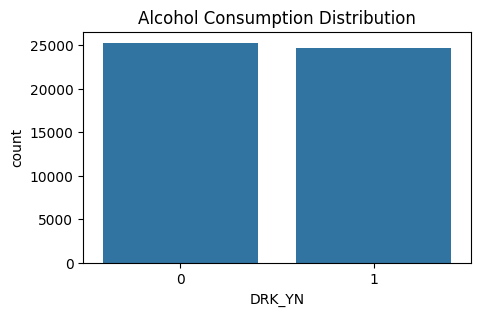

Numerical Columns:  ['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']


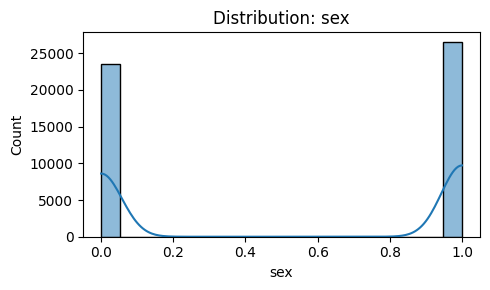

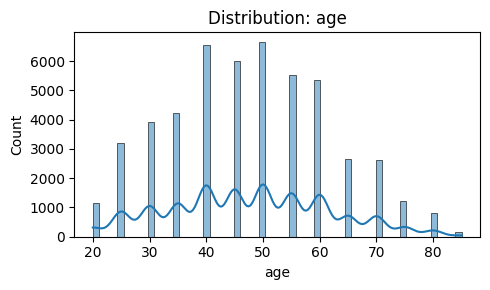

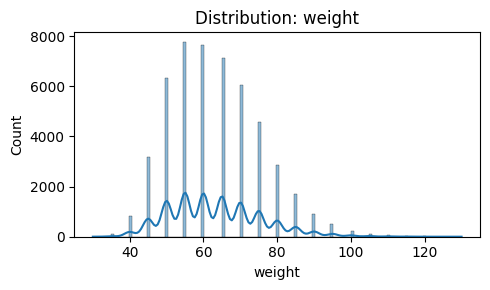

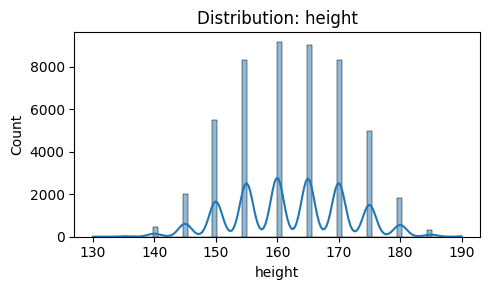

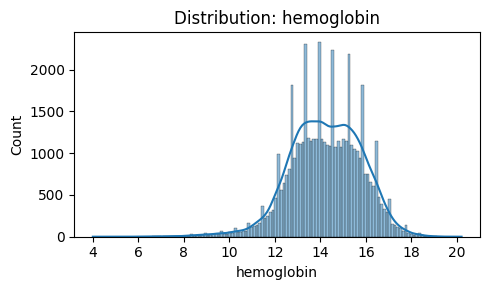

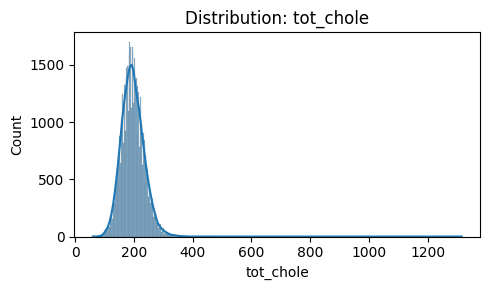

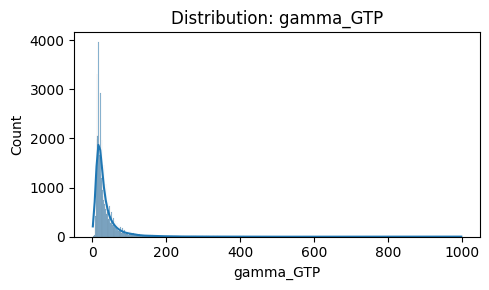

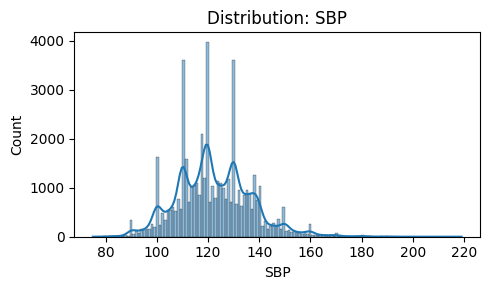

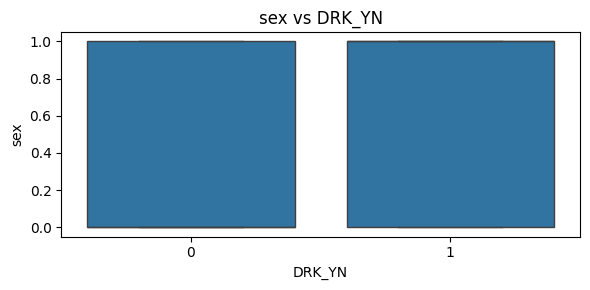

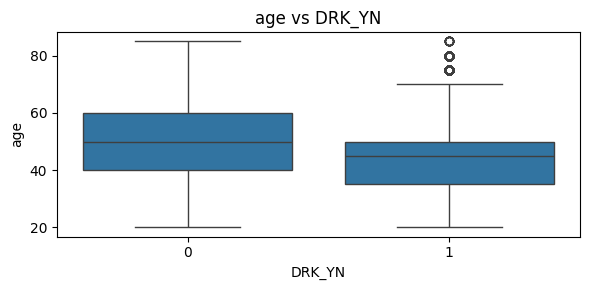

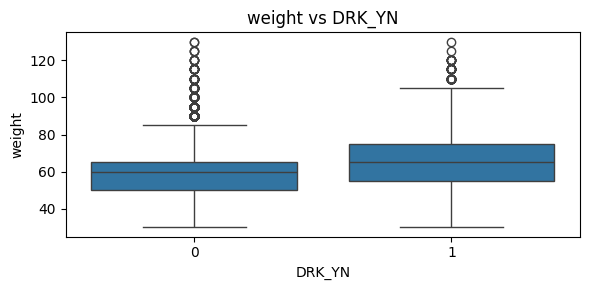

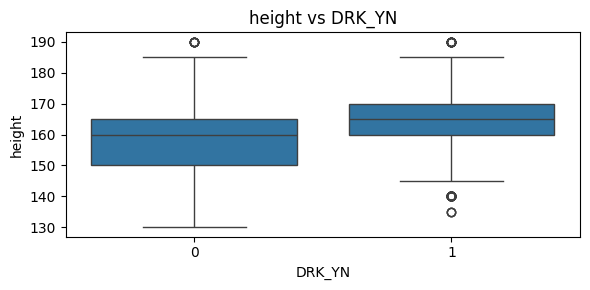

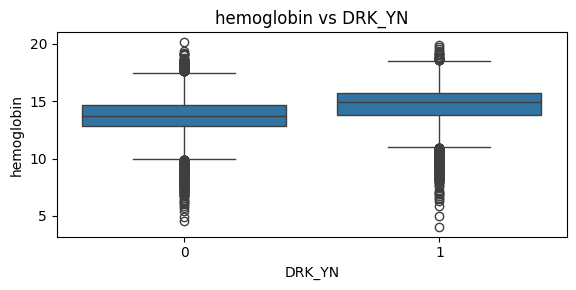

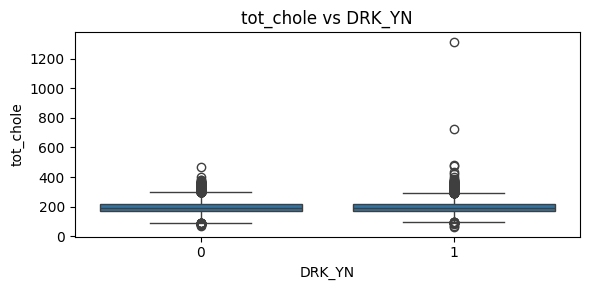

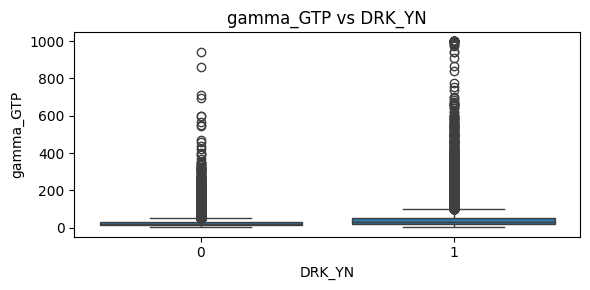

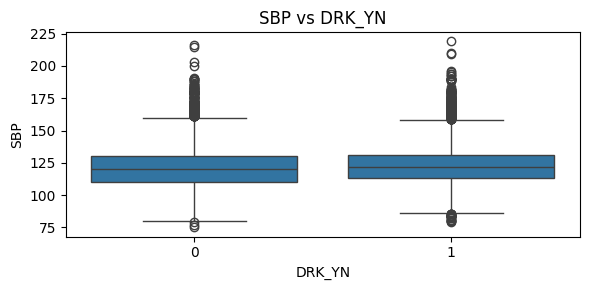

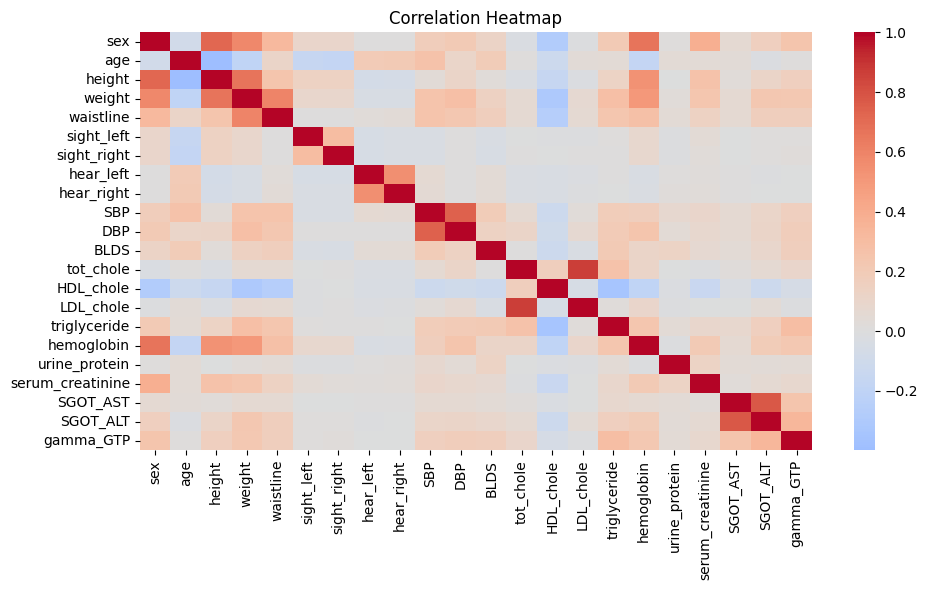

In [21]:
#Target Column Data Distribution By Sex
plt.figure(figsize=(5,3))
sns.countplot(x='DRK_YN', data=df)
plt.title("Alcohol Consumption Distribution")
plt.show()

X = df.drop(columns=['DRK_YN', 'SMK_stat_type_cd'])
y = df['DRK_YN']

num_cols = X.select_dtypes(include=np.number).columns.tolist()

print("Numerical Columns: ", num_cols)

#Selected columns for visualization
columns = ['sex', 'age', 'weight', 'height', 'hemoglobin', 'tot_chole', 'gamma_GTP', 'SBP']

#Numeric distribution for first eight columns
for col in columns:
  plt.figure(figsize=(5,3))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution: {col}")
  plt.tight_layout()
  plt.show()

#Box plot for numeric columns vs target column
for col in columns:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=df["DRK_YN"], y=df[col])
  plt.title(f"{col} vs DRK_YN")
  plt.tight_layout()
  plt.show()

#Correlation heatmap for numeric columns
if len(num_cols) > 1:
  corr = df[num_cols].corr(numeric_only=True)
  plt.figure(figsize=(10,6))
  sns.heatmap(corr, cmap="coolwarm", center=0)
  plt.title("Correlation Heatmap")
  plt.tight_layout()
  plt.show()

In [22]:
#Train/Test split

#Splitting data into 70/30 Train/Test ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (35000, 22) Test: (15000, 22)


In [23]:
#Preprocessing
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()
print("Numeric cols:", len(num_cols))
print("Categorical cols:", cat_cols)

num_imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

cat_imputer = SimpleImputer(strategy="most_frequent")
ohe = OneHotEncoder(handle_unknown="ignore")

# Numeric: impute to scale
Xtr_num = num_imputer.fit_transform(X_train[num_cols]) if num_cols else np.empty((len(X_train), 0))
Xte_num = num_imputer.transform(X_test[num_cols]) if num_cols else np.empty((len(X_test), 0))

Xtr_num = scaler.fit_transform(Xtr_num) if Xtr_num.shape[1] else Xtr_num
Xte_num = scaler.transform(Xte_num) if Xte_num.shape[1] else Xte_num

# Categorical: impute to one-hot
if cat_cols:
    Xtr_cat_raw = cat_imputer.fit_transform(X_train[cat_cols])
    Xte_cat_raw = cat_imputer.transform(X_test[cat_cols])

    Xtr_cat = ohe.fit_transform(Xtr_cat_raw)
    Xte_cat = ohe.transform(Xte_cat_raw)
else:
    Xtr_cat = sparse.csr_matrix((len(X_train), 0))
    Xte_cat = sparse.csr_matrix((len(X_test), 0))

X_train_p = sparse.hstack([sparse.csr_matrix(Xtr_num), Xtr_cat]).tocsr()
X_test_p  = sparse.hstack([sparse.csr_matrix(Xte_num), Xte_cat]).tocsr()

print("Transformed train:", X_train_p.shape, "Transformed test:", X_test_p.shape)


Numeric cols: 22
Categorical cols: []
Transformed train: (35000, 22) Transformed test: (15000, 22)


In [24]:
#Evaluation Model
def evaluate_model(name, model, Xtr, ytr, Xte, yte):
  """
    Parameters:
      - name: name of the model
      - model: model object
      - Xtr, ytr: training data
      - Xte, yte: testing data
    Returns:
      - Model name: String,
      - Accuracy, Precision, Recall, F1 scores: Float
  """
  model.fit(Xtr, ytr)
  pred = model.predict(Xte)

  acc = accuracy_score(yte, pred)
  prec = precision_score(yte, pred, zero_division=0)
  rec = recall_score(yte, pred, zero_division=0)
  f1 = f1_score(yte, pred, zero_division=0)

  print(f"| {name} |")
  print("Accuracy :", round(acc, 4))
  print("Precision:", round(prec, 4))
  print("Recall   :", round(rec, 4))
  print("F1       :", round(f1, 4))
  print("\nClassification report:")
  print(classification_report(yte, pred, zero_division=0))

  cm = confusion_matrix(yte, pred)
  ConfusionMatrixDisplay(cm).plot(cmap="Blues", values_format="d")
  plt.title(f"Confusion Matrix: {name}")
  plt.tight_layout()
  plt.show()

  return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}


| Neural Network (MLPClassifier) |
Accuracy : 0.7355
Precision: 0.7316
Recall   : 0.7338
F1       : 0.7327

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7589
           1       0.73      0.73      0.73      7411

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000



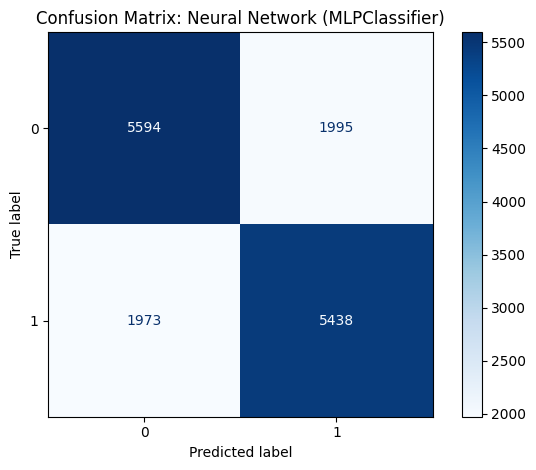

,Model,Accuracy,Precision,Recall,F1
0,Neural Network (MLPClassifier),0.735467,0.731602,0.733774,0.732687


In [25]:
#Neural Network (MLPClassifier)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    learning_rate_init=1e-3,
    max_iter=500,
    early_stopping=True,
    random_state=42
)

mlp_result = evaluate_model("Neural Network (MLPClassifier)", mlp, X_train_p, y_train, X_test_p, y_test)
pd.DataFrame([mlp_result])


| Logistic Regression (Baseline) |
Accuracy : 0.7281
Precision: 0.7308
Recall   : 0.712
F1       : 0.7213

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      7589
           1       0.73      0.71      0.72      7411

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000



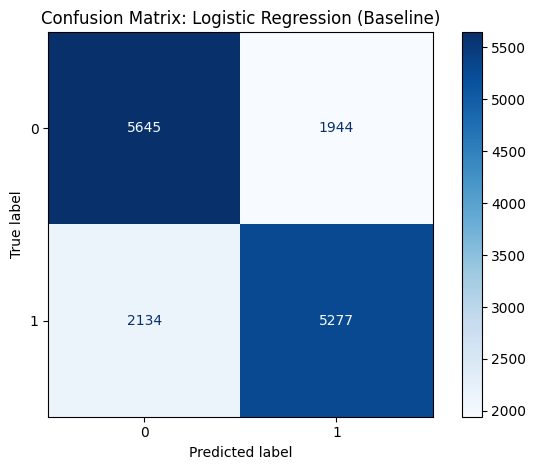

In [ ]:
#Baseline Models

#Logistic Regression
logreg = LogisticRegression(max_iter=3000, solver="saga", n_jobs=-1, random_state=42)

#Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=300, n_jobs=-1)

results = []
results.append(evaluate_model("Logistic Regression (Baseline)", logreg, X_train_p, y_train, X_test_p, y_test))
results.append(evaluate_model("Random Forest (Baseline)", rf, X_train_p, y_train, X_test_p, y_test))

pd.DataFrame(results)


In [ ]:
#Hyperparameter Tuning

#Different Train/Test rows for tuning
TUNE_N = 50_000
if X_train_p.shape[0] > TUNE_N:
    idx = np.arange(X_train_p.shape[0])
    idx_small, _, y_small, _ = train_test_split(
        idx, y_train, train_size=TUNE_N, stratify=y_train, random_state=42
    )
    X_tune = X_train_p[idx_small]
    y_tune = y_train.iloc[idx_small]
else:
    X_tune = X_train_p
    y_tune = y_train

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Tuning logistic regression model
logreg_dist = {"C": [0.01, 0.1, 1, 10, 50]}
logreg_rs = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=3000, solver="saga", n_jobs=-1, random_state=42),
    param_distributions=logreg_dist,
    n_iter=5,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    refit=True,
    verbose=1
)
logreg_rs.fit(X_tune, y_tune)
print("Best LogReg params:", logreg_rs.best_params_)
print("Best LogReg CV Accuracy:", logreg_rs.best_score_)

#Tuning random forest model
rf_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", 0.5]
}
rf_rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=rf_dist,
    n_iter=12,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    refit=True,
    verbose=1
)
rf_rs.fit(X_tune, y_tune)
print("Best RF params:", rf_rs.best_params_)
print("Best RF CV Accuracy:", rf_rs.best_score_)


In [ ]:
#Evaluating tuned models on test data
best_logreg = logreg_rs.best_estimator_
best_rf = rf_rs.best_estimator_

tuned_results = []
tuned_results.append(evaluate_model("Logistic Regression (tuned)", best_logreg, X_train_p, y_train, X_test_p, y_test))
tuned_results.append(evaluate_model("Random Forest (tuned)", best_rf, X_train_p, y_train, X_test_p, y_test))

pd.DataFrame(tuned_results)


In [ ]:
#Feature Selection (SelectKBest)
k_list = [5, 10, 15, 20, "all"]
fs_results = []

#Testing with different values of K to get the best feature
for K in k_list:
    fs = SelectKBest(mutual_info_classif, k=K)
    Xtr_fs = fs.fit_transform(X_train_p, y_train)
    Xte_fs = fs.transform(X_test_p)

    lr_fs = LogisticRegression(max_iter=3000, solver="saga", n_jobs=-1, random_state=42, C=best_logreg.C)
    rf_fs = RandomForestClassifier(random_state=42, n_jobs=-1, **rf_rs.best_params_)

    fs_results.append(evaluate_model(f"LogReg tuned + FS(K={K})", lr_fs, Xtr_fs, y_train, Xte_fs, y_test))
    fs_results.append(evaluate_model(f"RF tuned + FS(K={K})", rf_fs, Xtr_fs, y_train, Xte_fs, y_test))

pd.DataFrame(fs_results).sort_values("Accuracy", ascending=False).head(10)


In [ ]:
#ROC curves for different models
models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "MLP": mlp
}

plt.figure(figsize=(6,4))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curves (Comparison)")
plt.legend()
plt.tight_layout()
plt.show()
